<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Intro" data-toc-modified-id="Intro-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Intro</a></span></li><li><span><a href="#Colours-Arranged-by-Chance" data-toc-modified-id="Colours-Arranged-by-Chance-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Colours Arranged by Chance</a></span></li><li><span><a href="#Fractals" data-toc-modified-id="Fractals-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Fractals</a></span><ul class="toc-item"><li><span><a href="#Sierpinski-Triangle" data-toc-modified-id="Sierpinski-Triangle-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span><a href="https://en.wikipedia.org/wiki/Sierpinski_triangle" target="_blank">Sierpinski Triangle</a></a></span></li></ul></li><li><span><a href="#L-System" data-toc-modified-id="L-System-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>L-System</a></span><ul class="toc-item"><li><span><a href="#Algae" data-toc-modified-id="Algae-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Algae</a></span></li><li><span><a href="#Koch-Curve" data-toc-modified-id="Koch-Curve-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Koch Curve</a></span></li><li><span><a href="#Fractal-Plant" data-toc-modified-id="Fractal-Plant-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Fractal Plant</a></span></li><li><span><a href="#Dragon-Curve" data-toc-modified-id="Dragon-Curve-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Dragon Curve</a></span></li></ul></li><li><span><a href="#Spirograph" data-toc-modified-id="Spirograph-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Spirograph</a></span><ul class="toc-item"><li><span><a href="#Hypotrochoid" data-toc-modified-id="Hypotrochoid-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Hypotrochoid</a></span></li></ul></li></ul></div>

# Intro
This notebook explores introductory concepts and examples of generative art and computational creativity, especially guided/driven by the related [Kadenze Online course](https://www.kadenze.com/courses/generative-art-and-computational-creativity-i).

**Generative Art**: art generated via automated/autonomous procedures/processes

**Computational Creativity**: study of autonomous/computational process/systems for the resolution of creative tasks

In [1]:
# Basic libraries import
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import animation
from PIL import Image, ImageDraw

import os
import sys

import itertools
import collections

from math import cos, sin, pi

# Plotting
%matplotlib notebook

sns.set_context("paper")
sns.set_style("dark")

In [2]:
# util method to plot multiple version of same generative artwork
def plot_artworks(artwork_gen_fun, nb_plots_side):
    # Create a grid of random colours arrangement pieces
    fig, axarr = plt.subplots(nb_plots_side, nb_plots_side)
    for row in range(nb_plots_side):
        for col in range(nb_plots_side):
            axarr[row, col].imshow(artwork_gen_fun(row, col))
            axarr[row, col].set_title('')
            axarr[row, col].axis('off')
    plt.show()

# Colours Arranged by Chance
Mimicry of [Gerhard Richter’s 4900 Colours artwork](https://www.gerhard-richter.com/en/art/microsites/4900-colours).

Description: generate NxM grid of squares each assigned with a random color.

Possibly add-ons: 
* actual logic behind choice of color schema or more specific/meaningful seeding for the stochastic process
* [Mondrian imitation](https://www.wikiart.org/en/piet-mondrian/composition-a-1923)

In [3]:
def generate_colours_arranged(nb_squares_side: int, square_side: int):
    img_side = nb_squares_side * square_side
    img = Image.new('RGB', (img_side, img_side), (255, 255, 255))
    
    draw = ImageDraw.Draw(img)
    for x in range(nb_squares_side):
        for y in range(nb_squares_side):
            cur_x_pos = x*square_side
            cur_y_pos = y*square_side
            rand_color = np.random.randint(256, size=3)
            draw.rectangle([cur_x_pos, cur_y_pos, 
                            cur_x_pos+square_side, cur_y_pos+square_side], 
                           fill=tuple(rand_color))
    
    return img

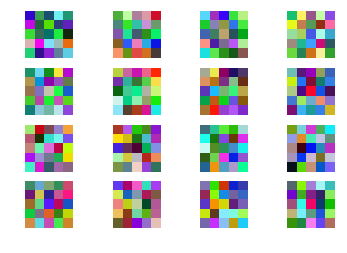

In [4]:
nb_squares_side = 5
square_side = 10

plot_artworks(lambda row, col: generate_colours_arranged(nb_squares_side, square_side),
             nb_plots_side=4)

In [5]:
# test to generate something similar to Mondrian work
# here just a very rough/minimal example
def generate_mondrian(width: int, height: int):
    img_side = nb_squares_side * square_side
    img = Image.new('RGB', (width, height), (255, 255, 255))
    
    g_const = 5
    num_rects = g_const*g_const
    rect_min_side = width/g_const
    rect_max_side = rect_min_side * 2
    
    draw = ImageDraw.Draw(img)
    prev_x_pos = 0
    prev_y_pos = 0
    for i in range(num_rects):
        rect_width = np.random.randint(rect_min_side, rect_max_side)
        rect_height = np.random.randint(rect_min_side, rect_max_side)
        rand_color = np.random.randint(256, size=3)
        draw.rectangle([prev_x_pos, prev_y_pos, 
                        prev_x_pos+rect_width, prev_y_pos+rect_height], 
                       fill=tuple(rand_color),
                       outline=(0, 0, 0))
        prev_x_pos += rect_width
        if prev_x_pos > width:
            prev_x_pos = 0
            prev_y_pos += rect_height
    
    return img

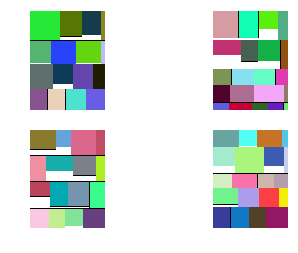

In [6]:
plot_artworks(lambda row, col: generate_mondrian(width=300, height=400),
             nb_plots_side=2)

# Fractals
Mathematical chaotic systems that have property of self-similarity (expanding/evolving simmetry).

[3Blue1Brown on Fractals, and the fact that they are typically not self-similar](https://www.youtube.com/watch?v=gB9n2gHsHN4)

Related concepts:
* chaos theory
* attractors

## [Sierpinski Triangle](https://en.wikipedia.org/wiki/Sierpinski_triangle)

Possible add-ons:
* generalize by shape
* 3D version (use Blender)

In [7]:
# draw the emergent central triangle (white) in a recursive way
# to simulate the sierpinski triangle
def rec_shrink_step(draw, triangle: list, depth: int=0, max_depth=1):
    # stop condition
    if depth >max_depth:
        return
    
    # for now just draw the emergent central hole
    hole = [((triangle[1][0]-triangle[0][0])/2+triangle[0][0], (triangle[0][1]-triangle[1][1])/2+triangle[1][1]), 
            ((triangle[2][0]-triangle[1][0])/2+triangle[1][0], (triangle[2][1]-triangle[1][1])/2+triangle[1][1]), 
            ((triangle[1][0], triangle[2][1]))]
    draw.polygon(hole, fill=(255, 255, 255))
    t1 = [triangle[0], hole[0], hole[2]]
    t2 = [hole[0], triangle[1], hole[1]]
    t3 = [hole[2], hole[1], triangle[2]]
    rec_shrink_step(draw, t1, depth+1, max_depth)
    rec_shrink_step(draw, t2, depth+1, max_depth)
    rec_shrink_step(draw, t3, depth+1, max_depth)

In [8]:
# main method to draw a sierpinski triangle
def sierpinski_triangle(img_side: int, max_depth: int):
    img = Image.new('RGB', (img_side, img_side), (255, 255, 255))

    draw = ImageDraw.Draw(img)
    triangle = [(0, img_side), (img_side/2, 0), (img_side, img_side)]
    triangle_color = (0, 0, 0)
    draw.polygon(triangle, fill=triangle_color)
    rec_shrink_step(draw, triangle, max_depth=max_depth)
    return img

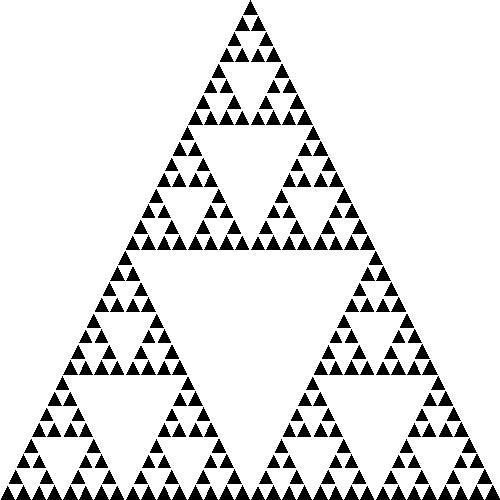

In [9]:
sierpinski_triangle(500, 4)

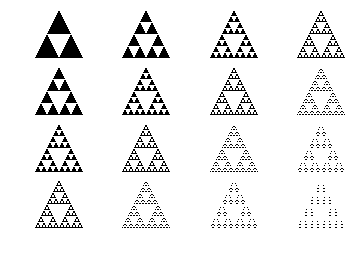

In [10]:
plot_artworks(lambda row, col: sierpinski_triangle(1000, row+col),
             nb_plots_side=4)

# L-System

L-system or Lindenmayer system is a parallel rewriting systems. Parallel because "as many rules as possible are applied simultaneously, per iteration". This differs from a formal grammar that instead applies one rule per iteration.

An L-system consist of an alphabet (variables + constants), a collection of production rules and an initial axiom. Optionally for graphic representation a translation mechanism is used to translate a string to a geometry.

L-Systems can be used to generate self-similar fractals.

**Disclaimer**: in some of the following examples I obtain visual results that are similar but actually wrong as I am applying the drawing rule to values before they are expanded and then proceed with the recursion.

A more correct approach would be to get the results from the final iteration and then proceed to apply the drawing rule. [Turtle](https://docs.python.org/3.0/library/turtle.html) is probably the most suited Python library for the drawing task.

## Algae
"Lindenmayer's original L-system for modelling the growth of algae." 

In [11]:
# L-system definition
variables = ['B', 'A']
axiom = ['A']
def rules(var):
    # verify that given var is in the system alphabet
    if var not in variables:
        raise Exception("{} not in the alphabet".format(var))
    if var == 'A':
        return ['A', 'B']
    elif var == 'B':
        return ['A']

In [12]:
NB_ITERATIONS = 10

res = axiom
for i in range(1, NB_ITERATIONS):
    res = list(itertools.chain(*[rules(x) for x in res]))
    print("n = {} : {}".format(i, res))

n = 1 : ['A', 'B']
n = 2 : ['A', 'B', 'A']
n = 3 : ['A', 'B', 'A', 'A', 'B']
n = 4 : ['A', 'B', 'A', 'A', 'B', 'A', 'B', 'A']
n = 5 : ['A', 'B', 'A', 'A', 'B', 'A', 'B', 'A', 'A', 'B', 'A', 'A', 'B']
n = 6 : ['A', 'B', 'A', 'A', 'B', 'A', 'B', 'A', 'A', 'B', 'A', 'A', 'B', 'A', 'B', 'A', 'A', 'B', 'A', 'B', 'A']
n = 7 : ['A', 'B', 'A', 'A', 'B', 'A', 'B', 'A', 'A', 'B', 'A', 'A', 'B', 'A', 'B', 'A', 'A', 'B', 'A', 'B', 'A', 'A', 'B', 'A', 'A', 'B', 'A', 'B', 'A', 'A', 'B', 'A', 'A', 'B']
n = 8 : ['A', 'B', 'A', 'A', 'B', 'A', 'B', 'A', 'A', 'B', 'A', 'A', 'B', 'A', 'B', 'A', 'A', 'B', 'A', 'B', 'A', 'A', 'B', 'A', 'A', 'B', 'A', 'B', 'A', 'A', 'B', 'A', 'A', 'B', 'A', 'B', 'A', 'A', 'B', 'A', 'B', 'A', 'A', 'B', 'A', 'A', 'B', 'A', 'B', 'A', 'A', 'B', 'A', 'B', 'A']
n = 9 : ['A', 'B', 'A', 'A', 'B', 'A', 'B', 'A', 'A', 'B', 'A', 'A', 'B', 'A', 'B', 'A', 'A', 'B', 'A', 'B', 'A', 'A', 'B', 'A', 'A', 'B', 'A', 'B', 'A', 'A', 'B', 'A', 'A', 'B', 'A', 'B', 'A', 'A', 'B', 'A', 'B', 'A', 'A',

## Koch Curve

In [13]:
# L-system definition
variables = ['F']
constants = ['-', '+']
axiom = ['F']
def rules(val):
    # verify that given val is in the system alphabet
    if val not in variables and val not in constants:
        raise Exception("{} not in the alphabet".format(val))
    if val in constants:
        return []
    elif val == 'F':
        return list('F+F-F-F+F')

In [19]:
def rec_draw_koch_curve(draw, vals, pos: tuple, angle=0, depth=0, max_depth=3):
    LINE_LENGTH = 10
    ANGLE_ADD =90
    
    if depth >= max_depth:
        return angle, pos
        
    for val in vals:
        if val == '+':
            angle += ANGLE_ADD
        elif val == '-':
            angle -= ANGLE_ADD
        elif val == 'F':
            new_pos =  (pos[0] + LINE_LENGTH*cos(angle*(pi/180)),pos[1] + LINE_LENGTH*sin(angle*(pi/180)))
            draw.line([pos, new_pos], fill=(0, 0, 255))
            pos = new_pos
        angle, pos = rec_draw_koch_curve(draw, rules(val), pos, angle, depth=depth+1, max_depth=max_depth)
    return angle, pos

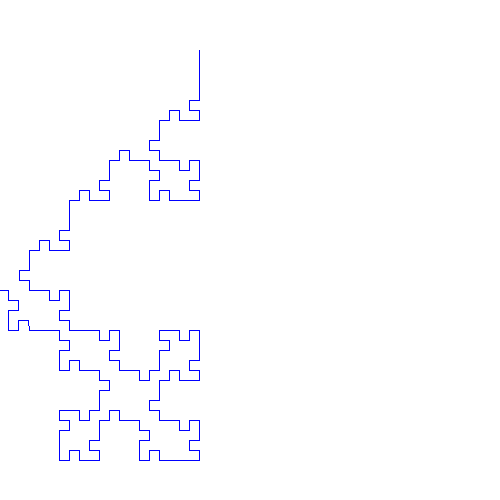

In [20]:
img = Image.new('RGB', (500, 500), (255, 255, 255))
draw = ImageDraw.Draw(img)
rec_draw_koch_curve(draw, axiom, (199, 50), 90, 0, max_depth=5)
img

## Fractal Plant

In [21]:
# L-system definition
variables = ['X', 'F']
constants = ['-', '+', '[', ']']
axiom = ['X']
def rules(val):
    # verify that given var is in the system alphabet
    if val not in variables and val not in constants:
        raise Exception("{} not in the alphabet".format(val))
    if val in constants:
        return [val]
    elif val == 'X':
        return list('F+[[X]-X]-F[-FX]+X')
    elif val == 'F':
        return ['F', 'F']

In [22]:
NB_ITERATIONS = 3

res = axiom
for i in range(1, NB_ITERATIONS):
    res = list(itertools.chain(*[rules(x) for x in res]))
    print("n = {} : {}".format(i, res))

n = 1 : ['F', '+', '[', '[', 'X', ']', '-', 'X', ']', '-', 'F', '[', '-', 'F', 'X', ']', '+', 'X']
n = 2 : ['F', 'F', '+', '[', '[', 'F', '+', '[', '[', 'X', ']', '-', 'X', ']', '-', 'F', '[', '-', 'F', 'X', ']', '+', 'X', ']', '-', 'F', '+', '[', '[', 'X', ']', '-', 'X', ']', '-', 'F', '[', '-', 'F', 'X', ']', '+', 'X', ']', '-', 'F', 'F', '[', '-', 'F', 'F', 'F', '+', '[', '[', 'X', ']', '-', 'X', ']', '-', 'F', '[', '-', 'F', 'X', ']', '+', 'X', ']', '+', 'F', '+', '[', '[', 'X', ']', '-', 'X', ']', '-', 'F', '[', '-', 'F', 'X', ']', '+', 'X']


In [23]:
def draw_fractal_plant(draw, plant, pos: tuple, angle=0):
    LINE_LENGTH = 5
    ANGLE_ADD = 25
    skip = 0
    count = 0
    
    for i, val in enumerate(plant):
        #print(skip)
        count += 1
        if skip > 0:
            skip -= 1
            continue
        elif val not in variables and val not in constants:
            raise Exception("{} not in the alphabet".format(val))
        elif val in constants:
            if val == '+':
                angle += ANGLE_ADD
            elif val == '-':
                angle -= ANGLE_ADD
            elif val == '[':
                skip = draw_fractal_plant(draw, plant[i+1:], (pos[0], pos[1]), angle)
            elif val == ']':
                return count
        elif val == 'X':
            continue
        elif val == 'F':
            new_pos =  (pos[0] + LINE_LENGTH*cos(angle*(pi/180)),pos[1] + LINE_LENGTH*sin(angle*(pi/180)))
            draw.line([pos, new_pos], fill=(0, 0, 0))
            #print(new_pos)
            pos = new_pos

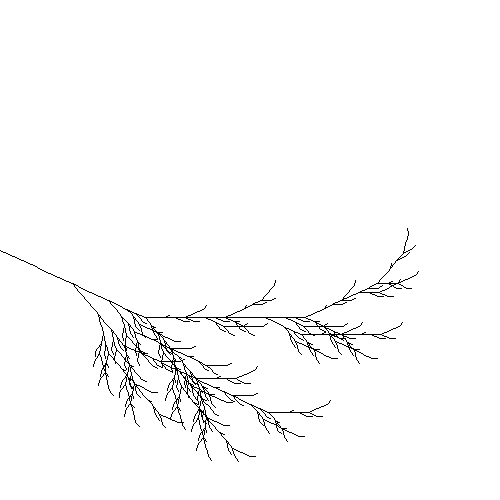

In [24]:
NB_ITERATIONS = 6

res = axiom
for i in range(1, NB_ITERATIONS):
    res = list(itertools.chain(*[rules(x) for x in res]))
img = Image.new('RGB', (500, 500), (255, 255, 255))
draw = ImageDraw.Draw(img)
draw_fractal_plant(draw, res, (0, 250), 25)
img

## Dragon Curve

In [25]:
# L-system definition
variables = ['X', 'Y']
constants = ['-', '+', 'F']
axiom = ['F', 'X']
def rules(val):
    # verify that given var is in the system alphabet
    if val not in variables and val not in constants:
        raise Exception("{} not in the alphabet".format(val))
    if val in constants:
        return []
    elif val == 'X':
        return list('X+YF+')
    elif val == 'Y':
        return list('-FX-Y')

In [26]:
def rec_draw_dragon_curve(draw, vals, pos: tuple, angle=0, depth=0, max_depth=3):
    LINE_LENGTH = 10
    ANGLE_ADD =90
    
    if depth >= max_depth:
        return angle, pos
        
    for val in vals:
        if val == '+':
            angle += ANGLE_ADD
        elif val == '-':
            angle -= ANGLE_ADD
        elif val == 'F':
            new_pos =  (pos[0] + LINE_LENGTH*cos(angle*(pi/180)),pos[1] + LINE_LENGTH*sin(angle*(pi/180)))
            draw.line([pos, new_pos], fill=(0, 0, 255))
            pos = new_pos
        angle, pos = rec_draw_dragon_curve(draw, rules(val), pos, angle, depth=depth+1, max_depth=max_depth)
    return angle, pos

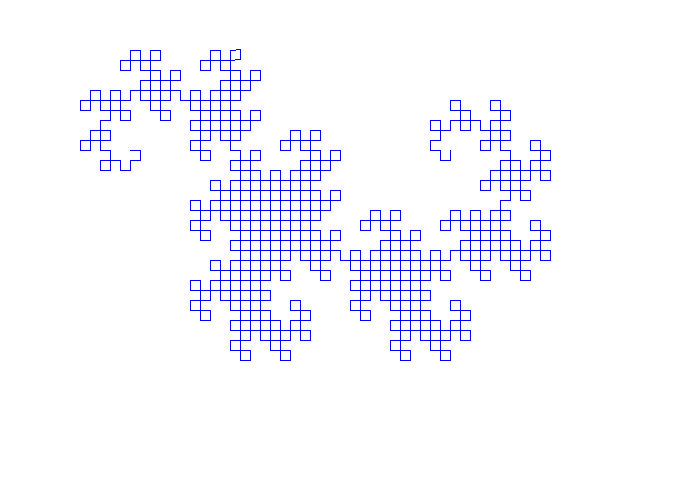

In [27]:
img = Image.new('RGB', (700, 500), (255, 255, 255))
draw = ImageDraw.Draw(img)
rec_draw_dragon_curve(draw, axiom, (450, 150), 90, 0, max_depth=11)
img

# Spirograph
A spirograph is a drawing tool based on mathematical roulette curves.

In [28]:
class Spirograph:
    def __init__(self, origin, R, r, d, angle, theta):
        self.origin = origin
        self.R = R
        self.r = r
        self.d = d
        self.angle = angle
        self.theta = theta
    
    def update(self):
        self.angle += self.theta

## Hypotrochoid
Roulette curve defined by

$$ x(\theta )=(R-r)\cos \theta +d\cos \left({R-r \over r}\theta \right)$$

$$y(\theta )=(R-r)\sin \theta -d\sin \left({R-r \over r}\theta \right)$$

<IPython.core.display.Javascript object>


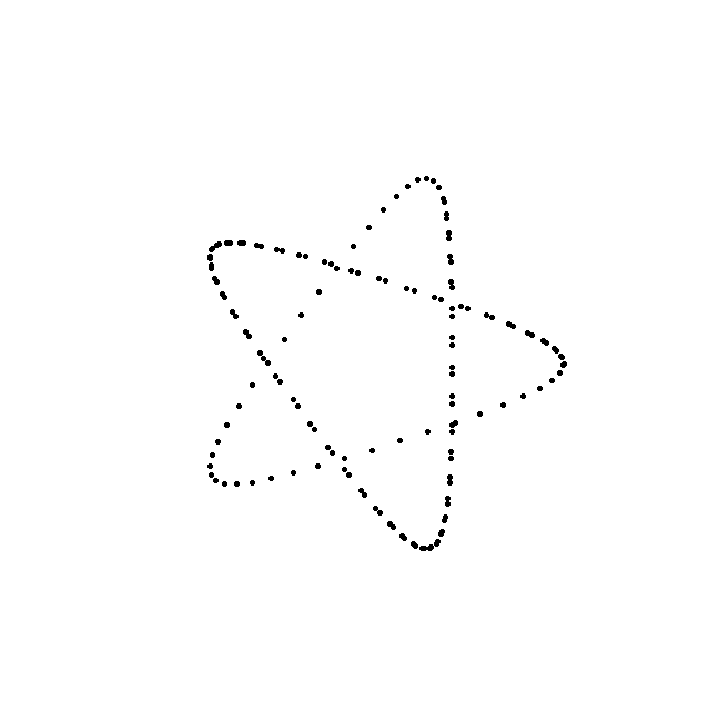

In [33]:
%matplotlib notebook
fig, ax = plt.subplots(dpi=120, figsize=(5, 5))
img_size = 500
img = Image.new('RGB', (img_size, img_size), 'white')
origin = np.array([img_size//2, img_size//2])
spirograph = Spirograph(origin=origin, R=125, r=75, d=125, angle=0, theta=0.2)
im = ax.imshow(img)
plt.axis('off')

def animate(i, img, im, spirograph):
    #img = Image.new('RGB', (img_size, img_size), 'white')
    draw = ImageDraw.Draw(img)
    origin = spirograph.origin
    R = spirograph.R
    r = spirograph.r
    d = spirograph.d
    angle = spirograph.angle
    # draw main circle
    #draw.ellipse([tuple(origin-R), tuple(origin+R)], outline=(0, 0, 255))
    # draw inside circle
    circle_2_pos = origin + (R - r) * np.array([np.cos(angle), np.sin(angle)])
    #draw.ellipse([tuple(circle_2_pos-r), tuple(circle_2_pos+r)], outline=(255, 0, 0))
    # draw hypotrochoid
    point_x = circle_2_pos[0] + d * np.cos(((R-r)/r)*angle)
    point_y = circle_2_pos[1] - d * np.sin(((R-r)/r)*angle)
    point = np.array([point_x, point_y])
    draw.ellipse([tuple(point-2), tuple(point+2)], fill='black')
    #draw.line([tuple(circle_2_pos), tuple(point)], fill='black')
    im.set_data(img)
    spirograph.update()
    

ani = animation.FuncAnimation(fig, animate, frames=500, interval=50, 
                              fargs=[img, im, spirograph])